# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Rhiannon Pytlak

EID: rkp643

Name: Sophia Scott

EID: sbs2753

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:


**Concepts of Gradient Boosting:**
* trains learners based upon minimizing the loss function of a learner 
  * (i.e., training on the residuals of the model) 
* Weak learners are decision trees constructed in a greedy manner with split points based on purity scores 
  * Learners should still remain weak and so they should be constrained 
    * (i.e., the maximum number of layers, nodes, splits, leaf nodes)
* All the learners have equal weights in the case of gradient boosting
  * The weight is usually set as the learning rate which is small in magnitude

**How does gradient boosting differ from Adaboost?**

Gradient boosting improvised upon some of the features of Adaboost to create a stronger and more efficient algorithm.

Instead of using the weighted average of individual outputs as the final outputs, it uses a loss function to minimize loss and converge upon a final output value. 

The loss function optimization is done using gradient descent, and hence the name gradient boosting.



# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

## Part A

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [ ]:
#train model function 
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
  svc = svm.SVC(kernel= kernel, C = C, gamma = gamma)
  svc.fit(X,y)
  return svc

In [ ]:
def plot_model(X, y, svc, kernel):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

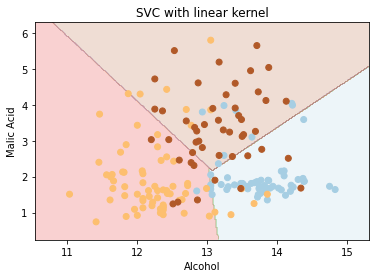

In [ ]:
SVC_linear = train_model(X,y)
plot_model(X, y, SVC_linear, kernel='linear')

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted = cross_val_predict(SVC_linear,X, y, cv=2)
print("accuracy",metrics.accuracy_score(y, predicted))
print("f1 score macro",metrics.f1_score(y, predicted, average='macro') )
print("f1 score micro",metrics.f1_score(y, predicted, average='micro') )
print("precision score",metrics.precision_score(y, predicted, average='macro')) 
print("recall score",metrics.recall_score(y, predicted, average='macro')) 
# fraction of mispredicted labels 
print("hamming_loss",metrics.hamming_loss(y, predicted))
#classification report 
print("classification_report", metrics.classification_report(y, predicted))

accuracy 0.7415730337078652
f1 score macro 0.7313842457383126
f1 score micro 0.7415730337078652
precision score 0.7311546125816067
recall score 0.7320860189384897
hamming_loss 0.25842696629213485
classification_report               precision    recall  f1-score   support

           0       0.76      0.80      0.78        59
           1       0.80      0.77      0.79        71
           2       0.64      0.62      0.63        48

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178



## Part B

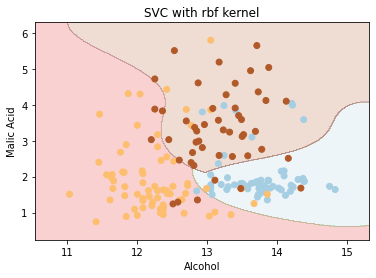

In [ ]:
SVC_rbf = train_model(X,y, kernel = 'rbf')
plot_model(X, y, SVC_rbf , kernel='rbf')

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted = cross_val_predict(SVC_rbf,X, y, cv=2)
print("accuracy",metrics.accuracy_score(y, predicted))
print("f1 score macro",metrics.f1_score(y, predicted, average='macro') )
print("f1 score micro",metrics.f1_score(y, predicted, average='micro') )
print("precision score",metrics.precision_score(y, predicted, average='macro')) 
print("recall score",metrics.recall_score(y, predicted, average='macro')) 
# fraction of mispredicted labels 
print("hamming_loss",metrics.hamming_loss(y, predicted))
# classification report 
print("classification_report", metrics.classification_report(y, predicted))

accuracy 0.7696629213483146
f1 score macro 0.7652105470287288
f1 score micro 0.7696629213483146
precision score 0.7677524867389908
recall score 0.7709676135911514
hamming_loss 0.2303370786516854
classification_report               precision    recall  f1-score   support

           0       0.79      0.83      0.81        59
           1       0.88      0.73      0.80        71
           2       0.63      0.75      0.69        48

    accuracy                           0.77       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.77      0.77       178



### **PART B Analysis:**

the RBF kernal function performs better than the linear function in accuracy,percsion and recall. 

linear kernals are a good basis to beigin with as it is starting with the simplest hypothesis space first. 

linear SVM is a parametric model while RBF kernal SVM is not. The complexity of RBF grows with the size of the training set. RBFis more expensive to train, has more hyper parameters to tune, and is more expensive with model selection. 

However, despite it being more expesnive it is able to model non-linear data and is necessary for obtaining the most accurate results.



## Part C

gamma =  0.5


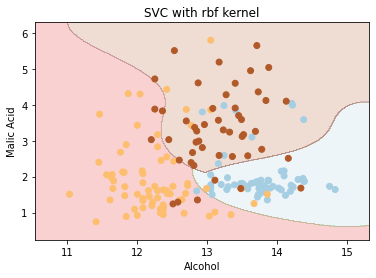

MODEL COMPARISON METRICS:
accuracy 0.7696629213483146
f1 score macro 0.7652105470287288
f1 score micro 0.7696629213483146
precision score 0.7677524867389908
recall score 0.7709676135911514
hamming_loss 0.2303370786516854
gamma =  1


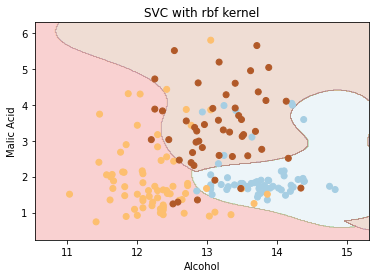

MODEL COMPARISON METRICS:
accuracy 0.7528089887640449
f1 score macro 0.7472416472416472
f1 score micro 0.752808988764045
precision score 0.7488290398126464
recall score 0.7514290071881383
hamming_loss 0.24719101123595505
gamma =  10


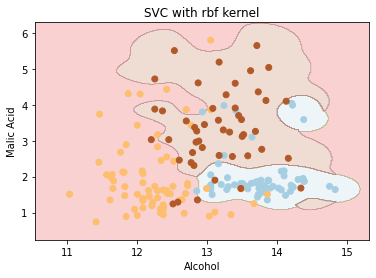

MODEL COMPARISON METRICS:
accuracy 0.7359550561797753
f1 score macro 0.7298440011205969
f1 score micro 0.7359550561797754
precision score 0.733974358974359
recall score 0.7303204822153259
hamming_loss 0.2640449438202247
gamma =  100


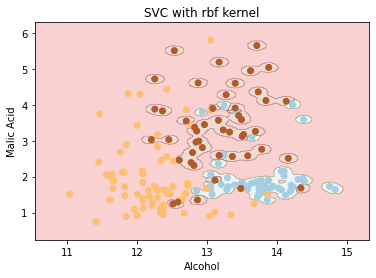

MODEL COMPARISON METRICS:
accuracy 0.5561797752808989
f1 score macro 0.47763040560202
f1 score micro 0.5561797752808989
precision score 0.6717825739408473
recall score 0.503113312644227
hamming_loss 0.4438202247191011


In [ ]:
gammas = [0.5, 1, 10, 100]

for i in range(len(gammas)):
  SVC_rbf_gammas = train_model(X,y, kernel = 'rbf', gamma = gammas[i])
  print( 'gamma = ', gammas[i])
  plot_model(X, y, SVC_rbf_gammas , kernel='rbf')
  print("MODEL COMPARISON METRICS:")
  predicted = cross_val_predict(SVC_rbf_gammas,X, y, cv=2)
  print("accuracy",metrics.accuracy_score(y, predicted))
  print("f1 score macro",metrics.f1_score(y, predicted, average='macro') )
  print("f1 score micro",metrics.f1_score(y, predicted, average='micro') )
  print("precision score",metrics.precision_score(y, predicted, average='macro')) 
  print("recall score",metrics.recall_score(y, predicted, average='macro')) 
  # fraction of mispredicted labels 
  print("hamming_loss",metrics.hamming_loss(y, predicted))


### **Part C Answer**
as gamma increases, the complexity of the "cuts" or decision boundaries increase and become more fitted to the exact data points in the training set. 

this ultimately decreases the accuracy, percision and recall of the model. Having too high of a gamma will lead to overfitting and make the model less transferable to new data

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


### Load in Data & Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_uci.csv to spam_uci.csv


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### **Part 3A**

Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 

**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.

In [ ]:
#Decision trees
decision_tree = DecisionTreeClassifier(random_state = 10).fit(X_train,y_train)

decision_treetepred = decision_tree.predict(X_test)
print("Testing Accuracy for random state 10 decision tree:", metrics.accuracy_score(y_test,decision_treetepred))

print("The roc_auc_score is:", roc_auc_score(y_test,decision_tree.predict_proba(X_test)[:,1]))

Testing Accuracy for random state 10 decision tree: 0.9098090849242922
The roc_auc_score is: 0.9040453749567611


In [ ]:
#Logistic Regression
logistic = LogisticRegression(random_state=10,solver='newton-cg').fit(X_train, y_train)

logistic_tepred = logistic.predict(X_test)
print("Testing Accuracy for logistic regression:", metrics.accuracy_score(y_test,logistic_tepred))

print("The roc_auc_score is:", roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1]))

Testing Accuracy for logistic regression: 0.9315339038841343
The roc_auc_score is: 0.9734682742610166


### **Part 3B**

For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.

In [ ]:
#Bagging classifier for decsion trees
dtbag = BaggingClassifier(base_estimator = decision_tree, n_estimators = 50, random_state = 10).fit(X_train,y_train)

dtbag_tepred = dtbag.predict(X_test)
print("Testing accuracy for decision tree ensemble", metrics.accuracy_score(y_test,dtbag_tepred))

print("The roc_auc_score is:", roc_auc_score(y_test,dtbag.predict_proba(X_test)[:,1]))

Testing accuracy for decision tree ensemble 0.9368005266622779
The roc_auc_score is: 0.9796839729119637


In [ ]:
#Bagging classifier for logistic regression
logistic_bag = BaggingClassifier(base_estimator = logistic, n_estimators = 50, random_state = 10).fit(X_train,y_train)

logistic_bag_tepred = logistic_bag.predict(X_test)
print("Testing accuracy for logistic regression ensemble", metrics.accuracy_score(y_test,logistic_bag_tepred))

print("The roc_auc_score is:", roc_auc_score(y_test,logistic_bag.predict_proba(X_test)[:,1]))

Testing accuracy for logistic regression ensemble 0.934167215273206
The roc_auc_score is: 0.97552769248874


##### **Part B Analysis**
**Accuracy of Decision Trees went up in both evaluation metrics**

Testing Accuracy --> 90 to 93

ROC & AUC -->  90 to ~98

**Accuracy of Logistic Regression up in both evaluation metrics**

Testing Accuracy --> 93.1 to 93.4

ROC & AUC --> 97.3 to 97.6
_________________________________________
When compared to non ensemble methods, the decision tree improved greatly while the logistic regression mostly remained the same with same slight improvements. 

This is due to the fact that ensemble relies on model variability or ambiguity in order to obtain a higher accuracy. 

Logistic regression models are going to be very similar while the decision tree model can vary a lot. 

As a result, the decision tree model benefits from the ensemble more than the logistic.

### **Part 3C**

Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


In [ ]:
#Using grid search
params = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}

rf_optimal_params = GridSearchCV(RandomForestClassifier(random_state=10), params)
rf_optimal_params.fit(X_train, y_train)
print("Random Forest Classifier Parameters:")
rf_optimal_params.best_params_

Random Forest Classifier Parameters:


{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}

In [ ]:
#Random Forest with grid search 
random_forest = RandomForestClassifier(random_state = 10, 
                                       criterion = rf_optimal_params.best_params_['criterion'],
                                       n_estimators = rf_optimal_params.best_params_['n_estimators']).fit(X_train,y_train)

random_forest_tepred = random_forest.predict(X_test)
print("Testing accuracy for random forest", metrics.accuracy_score(y_test,random_forest_tepred))

print("The roc_auc_score is:", roc_auc_score(y_test,random_forest.predict_proba(X_test)[:,1]))

Testing accuracy for random forest 0.9585253456221198
The roc_auc_score is: 0.9887989044964857


##### **Part C Anlysis**
of all models thus far, the grid searched random forest model has the highest testing accuracy and ROC & AUC

### **Part 3D**


Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

In [ ]:
#Using grid search for gradient boosting 
params =({"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]})

gb_optimal_params = GridSearchCV(GradientBoostingClassifier(), param_grid= params)
gb_optimal_params.fit(X_train, y_train)
print('Gradient Boost Best Parameters:')
print(gb_optimal_params.best_params_)

Gradient Boost Best Parameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}


In [ ]:
#Gradient Boost
gradient_boost = GradientBoostingClassifier(n_estimators = gb_optimal_params.best_params_['n_estimators'],
                                            learning_rate = gb_optimal_params.best_params_['learning_rate'],
                                            max_depth = gb_optimal_params.best_params_['max_depth'],
                                            subsample = gb_optimal_params.best_params_['subsample'],
                                            random_state = gb_optimal_params.best_params_['random_state']
                                            ).fit(X_train,y_train)

gradient_boost_ypred = gradient_boost.predict(X_test)
print("Testing accuracy for grid search gradient boost", metrics.accuracy_score(y_test,gradient_boost_ypred))

print("The roc_auc_score is:", roc_auc_score(y_test,gradient_boost.predict_proba(X_test)[:,1]))

Testing accuracy for grid search gradient boost 0.9552337063857801
The roc_auc_score is: 0.9889094533537314


In [ ]:
ada_params =({"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]})

ada_optimal_params = GridSearchCV(AdaBoostClassifier(), ada_params)
ada_optimal_params.fit(X_train, y_train)
print("Ada Boost Best Parameters:")
print(ada_optimal_params.best_params_)

Ada Boost Best Parameters:
{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}


In [ ]:
#Ada Boost
ada_boost = AdaBoostClassifier(random_state = ada_optimal_params.best_params_['random_state'],
                               learning_rate = ada_optimal_params.best_params_['learning_rate'],
                               n_estimators = ada_optimal_params.best_params_['n_estimators']).fit(X_train,y_train)

ada_boost_ypred = ada_boost.predict(X_test)
print("Testing accuracy for Ada Boost", metrics.accuracy_score(y_test,ada_boost_ypred))

print("The roc_auc_score is:", roc_auc_score(y_test,ada_boost.predict_proba(X_test)[:,1]))

Testing accuracy for Ada Boost 0.9512837393021725
The roc_auc_score is: 0.9858836241481498


## Answer:


the accuracies for AdaBoost and Gradient Boosting using Grid Search Cross Validation higher than decsion trees, logistic regression and bagging

However, they are relatively the same for random forest. 

### **Part 3E**
In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier.

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the accuracy_scores of the three classifiers vs n_estimators= [10, 100, 500] in one plot, and plot the roc_auc_scores of the three classifiers vs n_estimators= [10, 100, 500] in another plot. That is, keep all other hyperparameters (except for n_estimators) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (n_estimators).

In [ ]:
#best hyper parameters for Random Forest Classifer 
    #'criterion': 'gini', 'n_estimators': 500, 'random_state': 42
#best hyper parameters for Gradient Boosting Classifer 
    # 'learning_rate': 0.1 , 'max_depth': 3 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0
#best hyper parameters for AdaBoost Classifer 
    # {'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}


### Random Forest with 3 Different estimators 

In [ ]:
n_estimators = [10,100,500]

random_forest = []
#a for loop to run the random forest with our 3 different levels of n_estimators
for n in n_estimators:
    rfnes = RandomForestClassifier(criterion = 'gini', random_state = 42, n_estimators = n)
    rfnes.fit(X_train, y_train)
    y_pred = rfnes.predict(X_test)
    random_forest.append("Random Forest")
    random_forest.append(n)
    random_forest.append(accuracy_score(y_test, y_pred))
    random_forest.append(roc_auc_score(y_test, rfnes.predict_proba(X_test)[:, 1]))

length = 4
outputRf = [random_forest[i:i + length] for i in range(0, len(random_forest), length)]
outputRf



[['Random Forest', 10, 0.945358788676761, 0.981291388957239],
 ['Random Forest', 100, 0.956550362080316, 0.9883299633762335],
 ['Random Forest', 500, 0.9552337063857801, 0.9891234188838844]]

### Gradient Boosting Classifer with 3 different estimators 

In [ ]:
gboost = []
#a for loop to run the gradient boost with our 3 different levels of n_estimators
for n in n_estimators:
    gb = GradientBoostingClassifier(learning_rate = .1, max_depth = 3, subsample = 1, random_state = 42, n_estimators = n)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    gboost.append("Gradient Boost")
    gboost.append(n)
    gboost.append(accuracy_score(y_test, y_pred))
    gboost.append(roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

length = 4
outputGb = [gboost[i:i + length] for i in range(0, len(gboost), length)]
outputGb

[['Gradient Boost', 10, 0.8953258722843976, 0.9543923557248258],
 ['Gradient Boost', 100, 0.9506254114549045, 0.987072915886584],
 ['Gradient Boost', 500, 0.9552337063857801, 0.9889094533537314]]

## AdaBoost Classifer with 3 different estimators

In [ ]:
adaboost = []
#a for loop to run the adaboost with our 3 different levels of n_estimators
for n in n_estimators:
    ada = AdaBoostClassifier(learning_rate = .1, random_state = 42, n_estimators = n)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    adaboost.append("AdaBoost")
    adaboost.append(n)
    adaboost.append(accuracy_score(y_test, y_pred))
    adaboost.append(roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

length = 4
outputAda = [adaboost[i:i + length] for i in range(0, len(adaboost), length)]
outputAda

[['AdaBoost', 10, 0.8446346280447663, 0.9889094533537314],
 ['AdaBoost', 100, 0.9400921658986175, 0.9889094533537314],
 ['AdaBoost', 500, 0.9512837393021725, 0.9889094533537314]]

In [ ]:
df = pd.DataFrame(outputRf, columns= ['Model', 'n_estimators', 'Classic Ac', 'Roc Auc Acc'])
df2 = pd.DataFrame(outputGb, columns= ['Model', 'n_estimators', 'Classic Ac', 'Roc Auc Acc'])
df3 = pd.DataFrame(outputAda, columns= ['Model', 'n_estimators', 'Classic Ac', 'Roc Auc Acc'])

from functools import reduce

df =pd.concat([df, df2, df3])

df = df.round(4)
#df.reset_index(drop=True, inplace=True)
df

,Model,n_estimators,Classic Ac,Roc Auc Acc
0,Random Forest,10,0.9454,0.9813
1,Random Forest,100,0.9566,0.9883
2,Random Forest,500,0.9552,0.9891
0,Gradient Boost,10,0.8953,0.9544
1,Gradient Boost,100,0.9506,0.9871
2,Gradient Boost,500,0.9552,0.9889
0,AdaBoost,10,0.8446,0.9889
1,AdaBoost,100,0.9401,0.9889
2,AdaBoost,500,0.9513,0.9889


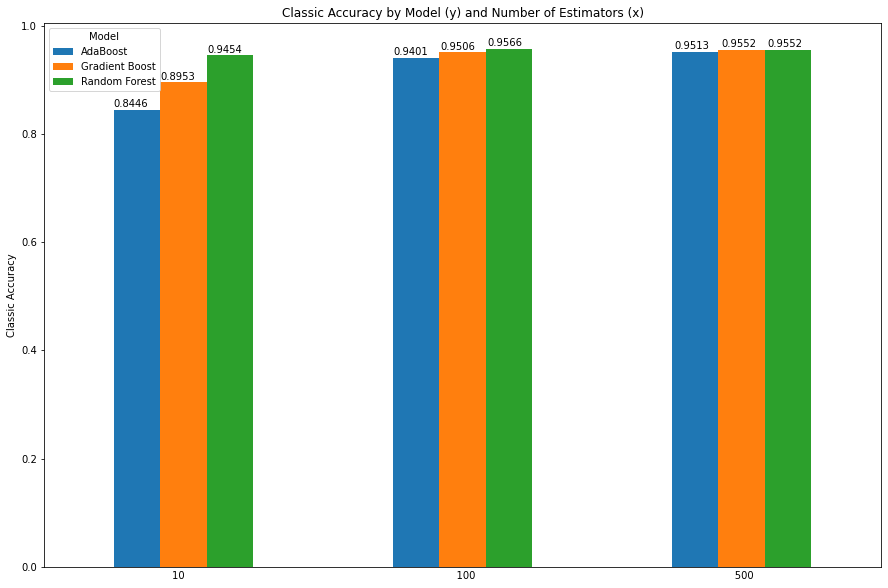

In [ ]:
import matplotlib.pyplot as plt 

piv = df.pivot(columns = 'Model', values = 'Classic Ac').plot(kind='bar', figsize=(15,10))
piv.set_xlabel("10                                                                                       100                                                                                   500")
piv.set_ylabel("Classic Accuracy")
piv.set_title("Classic Accuracy by Model (y) and Number of Estimators (x)")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

#adding numbers or accuracy assurance
for p in piv.patches:
    piv.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### **Analysis for Part E: Test Accuracy**
AdaBoost imporves the most with the increase in number of estimators, followed by gradient boost 

In the case of random forests there is a decrease in accuracy with the highest number of estimators, most likely due to overfitting / overtuning of parameters. 

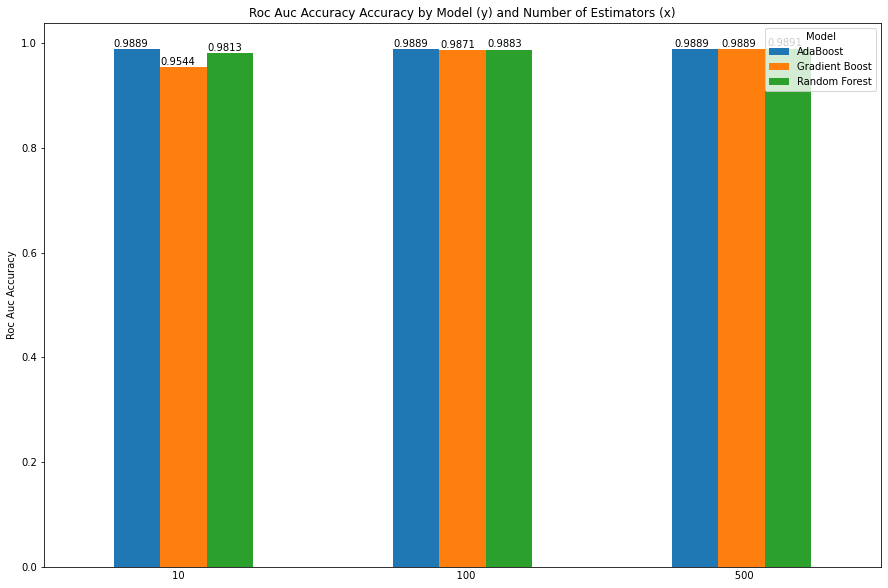

In [ ]:
piv = df.pivot(columns = 'Model', values = 'Roc Auc Acc').plot(kind='bar', figsize=(15,10))
piv.set_xlabel("10                                                                                       100                                                                                   500")
piv.set_ylabel("Roc Auc Accuracy")
piv.set_title("Roc Auc Accuracy Accuracy by Model (y) and Number of Estimators (x)")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

#adding numbers or accuracy assurance
for p in piv.patches:
    piv.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### **Analysis for Part E: ROC & AUC**

the only improvement is seen in gradient boost with an increase of estimators from 10 to 100. 

However, AdaBoost and Random Forests obtain the same classification accuracy regardless of the increase in estimators meaning that the percision and recall cannot be further improved with more training 